# Análise do Dataset MovieLens 100k
   ## Carregamento dos Dados

### Verificando as Informações Básicas

In [10]:
import pandas as pd
import os

#### Definindo o caminho para os dados

In [12]:
data_path = 'data/ml-100k/'

#### Carregando arquivo de Avaliações

In [13]:
# Definindo os nomes das colunas
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

# Construindo o caminho completo do arquivo
ratings_file = os.path.join(data_path, 'u.data')

# Lendo o arquivo
ratings = pd.read_csv(ratings_file, sep='\t', names=r_cols, encoding='latin-1')

# Verificando as primeiras linhas e informações básicas
print("--- Ratings Data ---")
print(ratings.head())
print("\nInformações do DataFrame de Ratings:")
ratings.info()
print("\nEstatísticas Descritivas dos Ratings:")
print(ratings.describe())
print(f"\nFormato do DataFrame de Ratings: {ratings.shape}")

--- Ratings Data ---
   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596

Informações do DataFrame de Ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   user_id         100000 non-null  int64
 1   movie_id        100000 non-null  int64
 2   rating          100000 non-null  int64
 3   unix_timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

Estatísticas Descritivas dos Ratings:
            user_id       movie_id         rating  unix_timestamp
count  100000.00000  100000.000000  100000.000000    1.000000e+05
mean      462.48475     425.530130       3.529860    8.835289e+08
std       266.61442    

#### Carregando o arquivo de Filmes

In [14]:
# Definindo os nomes das colunas
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
# Adicionando nomes para as colunas de gênero
genres = ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
m_cols.extend(genres)

# Construindo o caminho completo do arquivo
movies_file = os.path.join(data_path, 'u.item')

# Lendo o arquivo
movies = pd.read_csv(movies_file, sep='|', names=m_cols, encoding='latin-1')

# Verificando as primeiras linhas e informações básicas
print("\n\n--- Movies Data ---")
print(movies.head())
print("\nInformações do DataFrame de Filmes:")
movies.info()
# A coluna 'title' é a mais relevante para describe neste caso
print("\nEstatísticas Descritivas dos Filmes (Título):")
print(movies['title'].describe())
print(f"\nFormato do DataFrame de Filmes: {movies.shape}")

# Tipos de dados das colunas de gênero
print("\nTipos de dados das colunas de Gênero (exemplo):")
print(movies[genres].dtypes.head())



--- Movies Data ---
   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1           1  ...        0      

## Verificação de Integridade dos Dados

In [15]:
print("=== Verificação de Integridade dos Dados ===\n")

# Verificando Ratings
print("1. Verificando Ratings:")
print(f"- Total de avaliações: {len(ratings)}")
print(f"- Valores nulos: {ratings.isnull().sum().sum()}")
print(f"- Valores únicos de rating: {sorted(ratings['rating'].unique())}")
print(f"- Range de user_id: {ratings['user_id'].min()} a {ratings['user_id'].max()}")
print(f"- Range de movie_id: {ratings['movie_id'].min()} a {ratings['movie_id'].max()}\n")

# Verificando Movies
print("2. Verificando Movies:")
print(f"- Total de filmes: {len(movies)}")
print(f"- Valores nulos: {movies.isnull().sum().sum()}")
print(f"- Filmes duplicados: {movies['title'].duplicated().sum()}")
print(f"- Range de movie_id: {movies['movie_id'].min()} a {movies['movie_id'].max()}")
print(f"- Gêneros presentes: {sum(movies[genres].sum() > 0)} de {len(genres)} gêneros\n")

# Verificando Relacionamentos
print("3. Verificando Relacionamentos:")
# Verificando se todos os movie_id em ratings existem em movies
movies_in_ratings = set(ratings['movie_id'].unique())
movies_in_movies = set(movies['movie_id'].unique())
print(f"- Filmes em ratings que não estão em movies: {len(movies_in_ratings - movies_in_movies)}\n")

# Verificando distribuição de ratings
print("4. Distribuição de Ratings:")
rating_distribution = ratings['rating'].value_counts().sort_index()
print(rating_distribution)

# Verificando gêneros mais comuns
print("\n5. Gêneros mais comuns:")
genre_counts = movies[genres].sum().sort_values(ascending=False)
print(genre_counts.head(5))

=== Verificação de Integridade dos Dados ===

1. Verificando Ratings:
- Total de avaliações: 100000
- Valores nulos: 0
- Valores únicos de rating: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
- Range de user_id: 1 a 943
- Range de movie_id: 1 a 1682

2. Verificando Movies:
- Total de filmes: 1682
- Valores nulos: 1686
- Filmes duplicados: 18
- Range de movie_id: 1 a 1682
- Gêneros presentes: 19 de 19 gêneros

3. Verificando Relacionamentos:
- Filmes em ratings que não estão em movies: 0

4. Distribuição de Ratings:
rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64

5. Gêneros mais comuns:
Drama       725
Comedy      505
Action      251
Thriller    251
Romance     247
dtype: int64


## Análise Exploratória de Dados (EDA)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhorar a aparência dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6) # Define um tamanho padrão para as figuras

### Distribuição das Avaliações (Notas)

/var/folders/4z/5tgg46r14tqf0xydy8s4zk1w0000gn/T/ipykernel_36895/4281408865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')


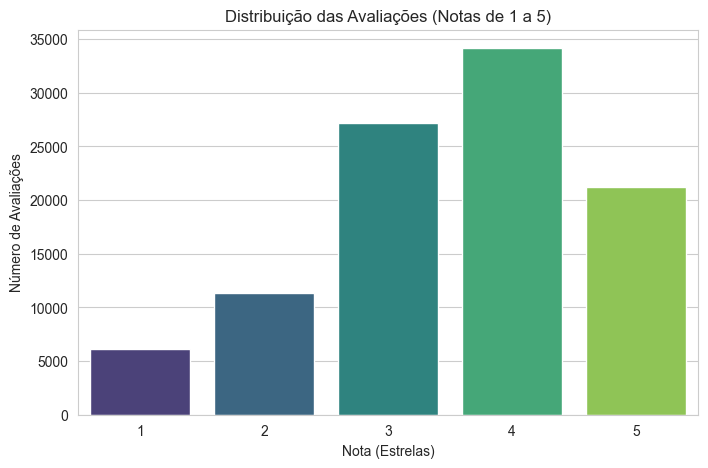


Contagem de cada nota:
rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64


In [23]:
plt.figure(figsize=(8, 5)) # Ajusta o tamanho desta figura específica
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribuição das Avaliações (Notas de 1 a 5)')
plt.xlabel('Nota (Estrelas)')
plt.ylabel('Número de Avaliações')
plt.show() # Exibe o gráfico

# Também podemos ver a contagem exata
print("\nContagem de cada nota:")
print(ratings['rating'].value_counts().sort_index())

### Número de Avaliações por Usuário

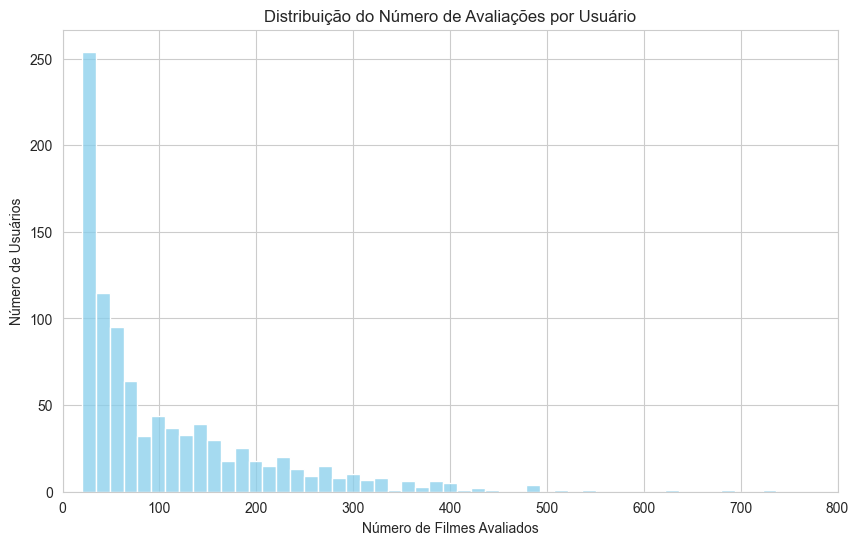


Estatísticas sobre o número de avaliações por usuário:
count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: rating, dtype: float64


In [24]:
# Calcula quantas avaliações cada usuário fez
ratings_per_user = ratings.groupby('user_id')['rating'].count()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=False, color='skyblue')
plt.title('Distribuição do Número de Avaliações por Usuário')
plt.xlabel('Número de Filmes Avaliados')
plt.ylabel('Número de Usuários')
plt.xlim(0, 800) # Ajuste o limite X se necessário para melhor visualização
plt.show()

print("\nEstatísticas sobre o número de avaliações por usuário:")
print(ratings_per_user.describe())

### Número de Avaliações por Filme

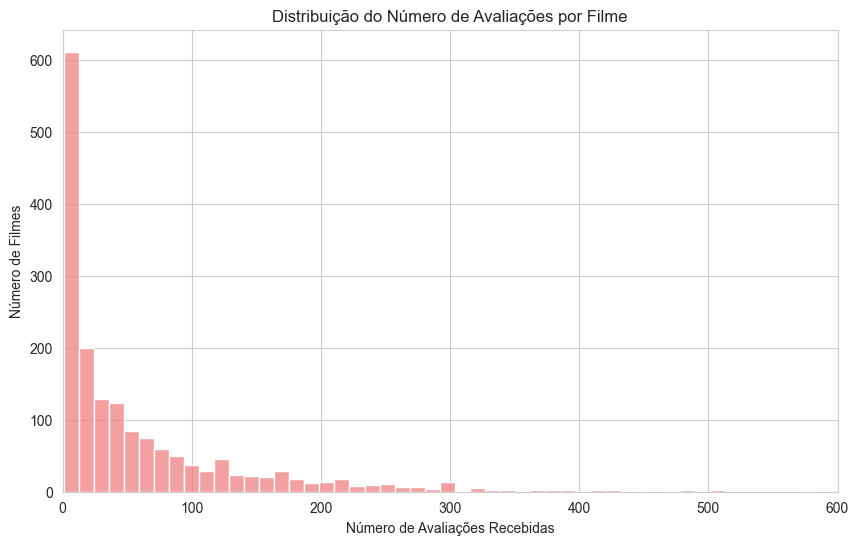


Estatísticas sobre o número de avaliações por filme:
count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: rating, dtype: float64


In [26]:
# Calcula quantas avaliações cada filme recebeu
ratings_per_movie = ratings.groupby('movie_id')['rating'].count()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=50, kde=False, color='lightcoral')
plt.title('Distribuição do Número de Avaliações por Filme')
plt.xlabel('Número de Avaliações Recebidas')
plt.ylabel('Número de Filmes')
plt.xlim(0, 600) # Ajuste o limite X se necessário
plt.show()

print("\nEstatísticas sobre o número de avaliações por filme:")
print(ratings_per_movie.describe())